<a href="https://colab.research.google.com/github/HamudiHasan/ML/blob/main/223_CSE_6023_Project_Sonet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Function for Plotting confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.matshow(conf_matrix, cmap=plt.cm.Blues)
    plt.colorbar()
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(x=j, y=i, s=conf_matrix[i, j], ha='center', va='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Read in the CSV file
data = pd.read_csv("https://raw.githubusercontent.com/HamudiHasan/ML/main/ML_DP_L_E_V_4_2.csv")

# Define the features and label columns
features = ['Dept','Gender','District','Age','SSC_Board','HSC_Board','SSC_RES','HSC','Course_1','Course_2','Course_3','Course_4','Course_5','Course_6','Course_7','Course_8','Course_9','Course_10']
label = 'Status'

# Extract the features and label
X = data[features]
y = data[label]

# Encode the label column
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

# Convert X to numpy array
X = np.array(X)

# Print the features , classes of the label
print("Features:", X)
print("Label classes:", list(le.classes_))


Features: [[1.   1.   0.   ... 1.   1.   0.  ]
 [1.   1.   0.   ... 2.33 3.   4.33]
 [1.   1.   0.   ... 3.33 3.   4.33]
 ...
 [5.   1.   0.   ... 0.   0.   0.  ]
 [5.   2.   1.   ... 0.   0.   0.  ]
 [5.   1.   2.   ... 0.   0.   0.  ]]
Label classes: ['Complete', 'Dropout']


Number of mislabeled points out of a total 925 points : 96


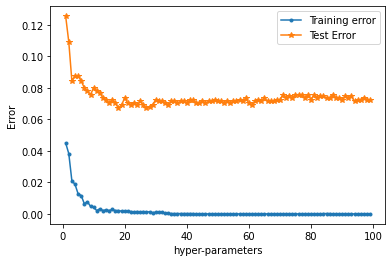

In [ ]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Train decision tree classifier on training set
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate number of mislabeled points
mis_labeled = (y_test != y_pred).sum()
total = X_test.shape[0]
print("Number of mislabeled points out of a total %d points : %d" % (total, mis_labeled))

# Lists to store training and test errors
train_errors = []
test_errors = []

# Loop through hyper-parameters values
for i in range(1, 100):

    #clf = svm.SVC(gamma=0.001, C=i,probability=True)
    #clf = tree.DecisionTreeClassifier(max_depth=i)
    #clf =KNeighborsClassifier(n_neighbors=i)
    #clf =AdaBoostClassifier(n_estimators=i)
    clf =RandomForestClassifier(n_estimators=i, random_state=0)
    
    
    clf.fit(X_train, y_train)
    y_tpred = clf.predict(X_test)
    y_lpred = clf.predict(X_train)
    train_errors.append((y_train != y_lpred).sum())
    test_errors.append((y_test != y_tpred).sum())
    #print("Test Error %d by max depth %d" % ((y_test != y_tpred).sum(), i) )
    #print("Train Error %d by max depth %d" % ((y_train != y_lpred).sum(), i) )
    
# Plot training and test errors
plt.plot(range(1,100), [i/4623 for i in train_errors], marker=".")
plt.plot(range(1,100), [i/925 for i in test_errors], marker="*")
plt.xlabel("hyper-parameters")
plt.ylabel("Error")
plt.legend(["Training error","Test Error"])
plt.show()


In [ ]:
min_error = min(test_errors)
optimal_depth = test_errors.index(min_error) + 1
print("Optimal hyper-parameters:", optimal_depth)

Optimal hyper-parameters: 18


Model:  SVC
Accuracy: 0.9241
auROC: 0.9724
auPR: 0.9872
F1-score: 0.9406
MCC: 0.8372


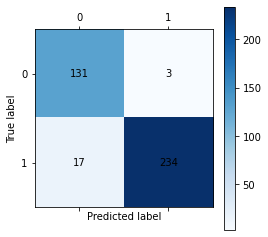

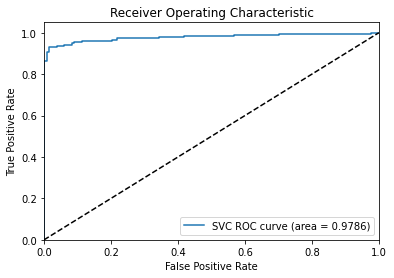

Model:  GaussianNB
Accuracy: 0.9126
auROC: 0.9670
auPR: 0.9833
F1-score: 0.9305
MCC: 0.8170


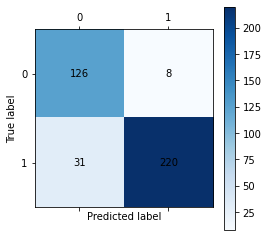

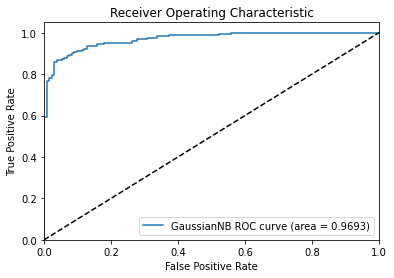

Model:  KNeighborsClassifier
Accuracy: 0.9159
auROC: 0.9680
auPR: 0.9834
F1-score: 0.9332
MCC: 0.8242


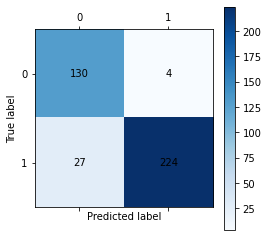

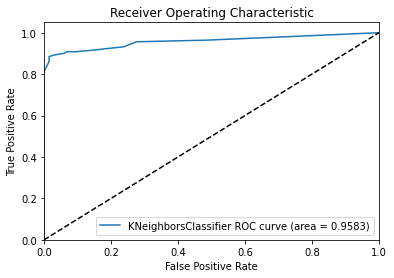

Model:  DecisionTreeClassifier
Accuracy: 0.9121
auROC: 0.9627
auPR: 0.9790
F1-score: 0.9304
MCC: 0.8152


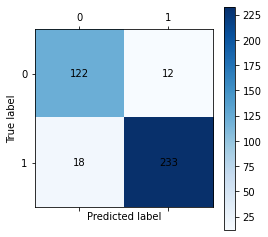

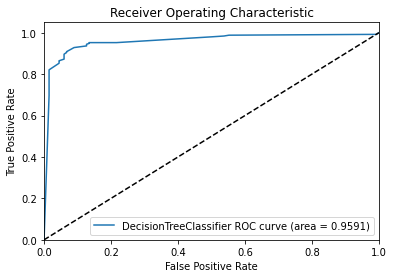

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Model:  LogisticRegression
Accuracy: 0.9115
auROC: 0.9635
auPR: 0.9800
F1-score: 0.9303
MCC: 0.8124


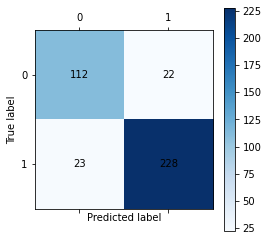

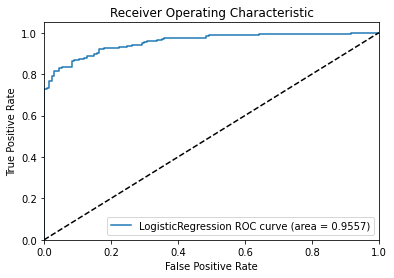

Model:  AdaBoostClassifier
Accuracy: 0.9131
auROC: 0.9648
auPR: 0.9811
F1-score: 0.9317
MCC: 0.8151


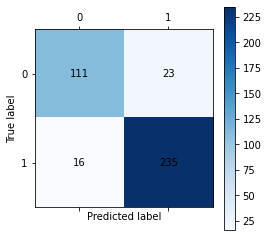

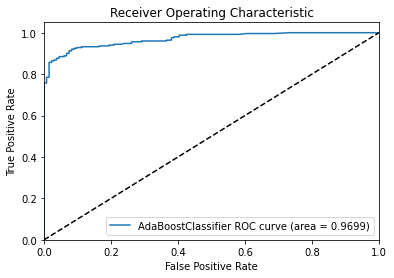

Model:  RandomForestClassifier
Accuracy: 0.9145
auROC: 0.9654
auPR: 0.9813
F1-score: 0.9328
MCC: 0.8178


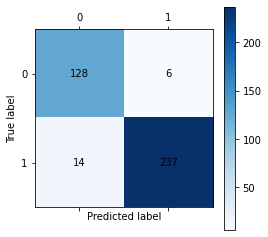

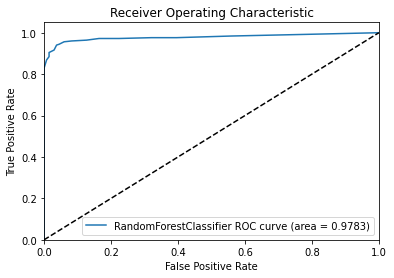

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the confusion matrix
CM = np.array([[0, 0], [0, 0]], dtype=int)

# Define neighbors, random state, max depth
num_neighbors = 16
rand_state = 2
max_dept = 6
num_est = 100
# Define the models to use
models = [svm.SVC(gamma=0.001, C=25.,probability=True), 
          GaussianNB(), 
          KNeighborsClassifier(n_neighbors=num_neighbors), 
          DecisionTreeClassifier(random_state=rand_state, max_depth=max_dept),
          LogisticRegression(), AdaBoostClassifier(n_estimators=32), RandomForestClassifier(n_estimators=18, random_state=0)]

# Define the evaluation metrics
metrics = {'Accuracy': [], 'auROC': [], 'auPR': [], 'F1-score': [], 'MCC': []}

# Define the number of folds and whether to shuffle the data
num_folds = 12
shuffle = True

# Create a cross-validator
cv = StratifiedKFold(n_splits=num_folds, shuffle=shuffle)

for model in models:
# Iterate through the folds
  for train_index, test_index in cv.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      
     
      # Fit the model on the training data
      model.fit(X_train, y_train)
          
      # Make predictions on the test data
      y_pred = model.predict(X_test)
      y_proba = model.predict_proba(X_test)[:, 1]
          
      # Evaluation metrics
      metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
      metrics['auROC'].append(roc_auc_score(y_test, y_proba))
      metrics['auPR'].append(average_precision_score(y_test, y_proba))
      metrics['F1-score'].append(f1_score(y_test, y_pred))
      metrics['MCC'].append(matthews_corrcoef(y_test, y_pred))
          
      # Confusion matrix
      CM += confusion_matrix(y_test, y_pred) 

  # Evaluation Metrics
  print('Model: ',model.__class__.__name__)
  for metric, values in metrics.items():
    print(f'{metric}: {np.mean(values):.4f}')
  plot_confusion_matrix(y_test, y_pred)

  

  # Plot the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, label='{} ROC curve (area = {:.4f})'.format(model.__class__.__name__, roc_auc))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
    

Epoch 1/20
93/93 [==============================] - 1s 7ms/step - loss: 3.0263 - accuracy: 0.3217 - val_loss: 1.2110 - val_accuracy: 0.3501
Epoch 2/20
93/93 [==============================] - 0s 5ms/step - loss: 0.8620 - accuracy: 0.5366 - val_loss: 0.6080 - val_accuracy: 0.7351
Epoch 3/20
93/93 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7767 - val_loss: 0.4330 - val_accuracy: 0.8108
Epoch 4/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8218 - val_loss: 0.3684 - val_accuracy: 0.8419
Epoch 5/20
93/93 [==============================] - 0s 3ms/step - loss: 0.3542 - accuracy: 0.8481 - val_loss: 0.3311 - val_accuracy: 0.8566
Epoch 6/20
93/93 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.8570 - val_loss: 0.3082 - val_accuracy: 0.8676
Epoch 7/20
93/93 [==============================] - 1s 5ms/step - loss: 0.3051 - accuracy: 0.8670 - val_loss: 0.2926 - val_accuracy: 0.8741
Epoch 8/20
93/93 [==

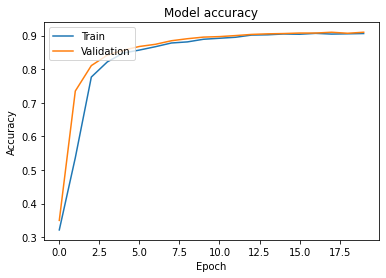

Epoch 1/20
93/93 [==============================] - 2s 6ms/step - loss: 0.7959 - accuracy: 0.6434 - val_loss: 0.4410 - val_accuracy: 0.8233
Epoch 2/20
93/93 [==============================] - 0s 4ms/step - loss: 0.3785 - accuracy: 0.8473 - val_loss: 0.3428 - val_accuracy: 0.8603
Epoch 3/20
93/93 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.8627 - val_loss: 0.3152 - val_accuracy: 0.8672
Epoch 4/20
93/93 [==============================] - 0s 4ms/step - loss: 0.3062 - accuracy: 0.8683 - val_loss: 0.2991 - val_accuracy: 0.8713
Epoch 5/20
93/93 [==============================] - 0s 4ms/step - loss: 0.2943 - accuracy: 0.8781 - val_loss: 0.2894 - val_accuracy: 0.8837
Epoch 6/20
93/93 [==============================] - 0s 3ms/step - loss: 0.2850 - accuracy: 0.8794 - val_loss: 0.2807 - val_accuracy: 0.8830
Epoch 7/20
93/93 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 0.8819 - val_loss: 0.2815 - val_accuracy: 0.8750
Epoch 8/20
93/93 [==

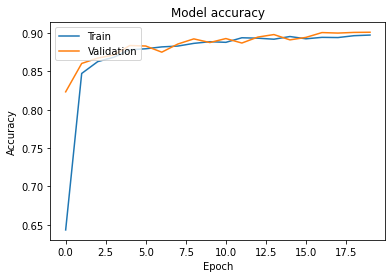

Epoch 1/20
93/93 [==============================] - 1s 5ms/step - loss: 1.9091 - accuracy: 0.4196 - val_loss: 0.6516 - val_accuracy: 0.6499
Epoch 2/20
93/93 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7748 - val_loss: 0.4041 - val_accuracy: 0.8242
Epoch 3/20
93/93 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.8462 - val_loss: 0.3426 - val_accuracy: 0.8549
Epoch 4/20
93/93 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8656 - val_loss: 0.3123 - val_accuracy: 0.8692
Epoch 5/20
93/93 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.8789 - val_loss: 0.2939 - val_accuracy: 0.8791
Epoch 6/20
93/93 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.8851 - val_loss: 0.2827 - val_accuracy: 0.8832
Epoch 7/20
93/93 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.8913 - val_loss: 0.2706 - val_accuracy: 0.8919
Epoch 8/20
93/93 [==

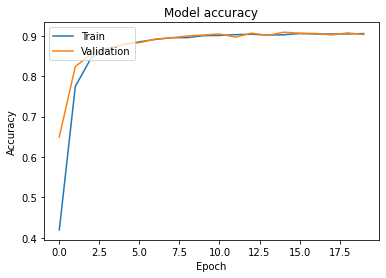

Epoch 1/20
93/93 [==============================] - 1s 5ms/step - loss: 0.4155 - accuracy: 0.8078 - val_loss: 0.3325 - val_accuracy: 0.8590
Epoch 2/20
93/93 [==============================] - 0s 4ms/step - loss: 0.3082 - accuracy: 0.8692 - val_loss: 0.2960 - val_accuracy: 0.8733
Epoch 3/20
93/93 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.8802 - val_loss: 0.2809 - val_accuracy: 0.8849
Epoch 4/20
93/93 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.8919 - val_loss: 0.2715 - val_accuracy: 0.8901
Epoch 5/20
93/93 [==============================] - 0s 4ms/step - loss: 0.2664 - accuracy: 0.8940 - val_loss: 0.2649 - val_accuracy: 0.8929
Epoch 6/20
93/93 [==============================] - 0s 4ms/step - loss: 0.2605 - accuracy: 0.8932 - val_loss: 0.2611 - val_accuracy: 0.9001
Epoch 7/20
93/93 [==============================] - 0s 3ms/step - loss: 0.2549 - accuracy: 0.8994 - val_loss: 0.2552 - val_accuracy: 0.8992
Epoch 8/20
93/93 [==

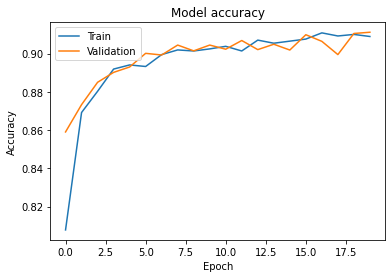

Epoch 1/20
93/93 [==============================] - 1s 5ms/step - loss: 1.6069 - accuracy: 0.6632 - val_loss: 0.4302 - val_accuracy: 0.7928
Epoch 2/20
93/93 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8530 - val_loss: 0.2972 - val_accuracy: 0.8739
Epoch 3/20
93/93 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.8811 - val_loss: 0.2696 - val_accuracy: 0.8884
Epoch 4/20
93/93 [==============================] - 0s 3ms/step - loss: 0.2593 - accuracy: 0.8924 - val_loss: 0.2572 - val_accuracy: 0.8955
Epoch 5/20
93/93 [==============================] - 0s 4ms/step - loss: 0.2480 - accuracy: 0.9000 - val_loss: 0.2489 - val_accuracy: 0.8958
Epoch 6/20
93/93 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.8995 - val_loss: 0.2431 - val_accuracy: 0.9061
Epoch 7/20
93/93 [==============================] - 0s 3ms/step - loss: 0.2363 - accuracy: 0.9054 - val_loss: 0.2371 - val_accuracy: 0.9081
Epoch 8/20
93/93 [==

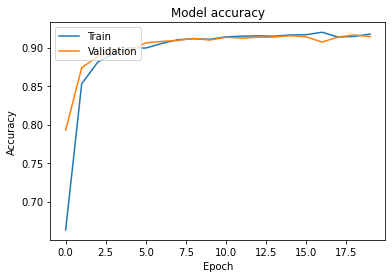

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

num_folds = 5
shuffle = True

kf = KFold(n_splits=num_folds, shuffle=shuffle)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

# create the model
    model = Sequential()
    model.add(Dense(10, input_dim=18, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X, y), epochs=20, batch_size=40)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
